1632036002 JongSeop Park, Koreatech

kugipark@gmail.com

### Assignment. 산학지형 기상 정보 대비 Burned Area에 대한 EDA 및 Regression를 활용한 예측

* 데이터 집합 소스
   * 설명: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
       * Features
         * 1: X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
         * 2: Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
         * 3: month - month of the year: 'jan' to 'dec'
         * 4: day - day of the week: 'mon' to 'sun'
         * 5: FFMC - FFMC index from the FWI system: 18.7 to 96.20
         * 6: DMC - DMC index from the FWI system: 1.1 to 291.3
         * 7: DC - DC index from the FWI system: 7.9 to 860.6
         * 8: ISI - ISI index from the FWI system: 0.0 to 56.10
         * 9: temp - temperature in Celsius degrees: 2.2 to 33.30
         * 10: RH - relative humidity in %: 15.0 to 100
         * 11: wind - wind speed in km/h: 0.40 to 9.40
         * 12: rain - outside rain in mm/m2 : 0.0 to 6.4
       * Target
         * area - the burned area of the forest (in ha): 0.00 to 1090.84
   * 관련 논문 및 자료
     * P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. http://www3.dsi.uminho.pt/pcortez/fires.pdf
     * 논문 발췌 중요 그림
     ![fig1](http://nbviewer.jupyter.org/github/bluebibi/LINK_ML_BIG_DATA/blob/master/figures/fire.png)
     ![fi2](http://nbviewer.jupyter.org/github/bluebibi/LINK_ML_BIG_DATA/blob/master/figures/fire_map.png)
     * File Weather Index
        * https://www.frames.gov/files/6014/1576/1411/FWI-history.pdf
   * 데이터: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

#### 패키지 import

In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
fire_data_file = './fire_data.csv'

try:
    df = pd.read_csv(fire_data_file)
    print '저장된 데이터 로드됨: ' + fire_data_file
except IOError:
    path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
    raw_csv = urllib2.urlopen(path)
    feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
    target_name = 'area'
    all_names = feature_names + (target_name,)
    df = pd.read_csv(raw_csv, names=all_names)
    df.to_csv(fire_data_file, index=False)
    print '온라인으로 데이터 다운로드됨: ' + fire_data_file

저장된 데이터 로드됨: ./fire_data.csv


In [3]:
print df.head(5)

print 

print df[140:145]

   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
1  7  5    mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7     0     0
2  7  4    oct  tue  90.6  35.4  669.1  6.7    18  33   0.9     0     0
3  7  4    oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3     0     0
4  8  6    mar  fri  91.7  33.3   77.5    9   8.3  97     4   0.2     0

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH wind rain  area
140  1  4   sep  tue    91  129.5  692.6     7  21.7  38  2.2    0  0.43
141  2  5   sep  mon  90.9  126.5  686.5     7  21.9  39  1.8    0  0.47
142  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  4.5    0  0.55
143  8  6   aug  fri  90.1    108  529.8  12.5  21.2  51  8.9    0  0.61
144  1  2   jul  sat    90   51.3  296.3   8.7  16.6  53  5.4    0  0.71


### [Mission 1] 불이 가장 많이 발생한 지역 좌표 (X, Y) 상위 5개를 제시하시오.
 * numpy 및 pandas에서 제공되는 gropyby, sum, stack, sort 등의 메소드 활용 필요

In [4]:
sdf = df[['X', 'Y', 'area']]
sdf

,X,Y,area
0,X,Y,area
1,7,5,0
2,7,4,0
3,7,4,0
4,8,6,0
5,8,6,0
6,8,6,0
7,8,6,0
8,8,6,0
9,8,6,0


In [5]:
gsdf = sdf.groupby(['X','Y'])
gsdf.head(1)

,X,Y,area
0,X,Y,area
1,7,5,0
2,7,4,0
4,8,6,0
13,6,5,0
17,5,5,0
18,8,5,0
19,6,4,0
22,5,4,0
29,6,3,0


In [6]:
gsdf_sum = gsdf.sum()
gsdf_sum

area
X Y                                                   
1 2                   000000000000.550.71212.88005.800
  3                 05.3330.3270.760.7206.360.33043.32
  4     0.433.54.5307.2102.1328.198.12009.7182.753.710
  5                                  1.467.311.5395.18
2 2  000000000001.071.638.7110.0115.4537.02200.9400...
  3                                                  0
  4  0001.611.6411.3210.132.870.758.854.250001.4716...
  5  00.470.774.694.887.048.6810.0203.09003.933.050...
3 3                                               6.58
  4  000000000000000000001.4311.2435.880.762.4703.3...
  5                                         0000002.18
  6                                               0000
4 3  000000036.850.683.3303.942.933.647.838.4810.08...
  4  000000000003.0724.2328.6628.6629.4848.5588.490...
  5  000000009.4111.0614.5731.72154.882.6401.750000...
  6                               000064.18.985.389.27
5 4  00000.951.462.576.380.0924.244.41001.643.7107....
  5                                                000
  6                                        0013.993.63
6 3  0000000001.94010.341.56014.2934.3656.0406.1000...
  4                        0001.97.4103.390.928.742.14
  5  0000000.91.192.142.292.512.534.618.3110.9312.1...
  6                                             08.590
7 3                                             027.35
  4  0000000001.561.691.752.746.838.2413.052626.133...
  5                             000017.249.3700010.820
  6                                             086.45
8 3                                      0.9623.411.94
  4                                              12.18
  5                                      02.010.680.24
  6  00000000000.611.121.952.552.695.235.446.967.19...
  8                                             185.76
9 4                                   105.6681.6370.32
  5                                              08.16
  6                                              42.87
  9                                    000.361.3602.75
X Y                                               area

In [7]:
gsdf.head(5)

,X,Y,area
0,X,Y,area
1,7,5,0
2,7,4,0
3,7,4,0
4,8,6,0
5,8,6,0
6,8,6,0
7,8,6,0
8,8,6,0
10,7,5,0


In [8]:
print gsdf_sum.iloc(1)

In [9]:
gsdf_sum_stack = gsdf_sum.stack()
gsdf_sum_stack.sort(ascending=False)
gsdf_sum_stack

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


X  Y      
X  Y  area                                                 area
3  3  area                                                 6.58
9  6  area                                                42.87
8  8  area                                               185.76
   4  area                                                12.18
9  4  area                                     105.6681.6370.32
1  5  area                                    1.467.311.5395.18
7  6  area                                               086.45
6  6  area                                               08.590
9  5  area                                                08.16
1  3  area                   05.3330.3270.760.7206.360.33043.32
7  3  area                                               027.35
8  5  area                                        02.010.680.24
5  6  area                                          0013.993.63
6  4  area                          0001.97.4103.390.928.742.14
2  4  area    0001.611.6411.3

In [10]:
type(gsdf_sum_stack)

pandas.core.series.Series

In [11]:
gsdf_sum_stack[0:5]

X  Y      
X  Y  area      area
3  3  area      6.58
9  6  area     42.87
8  8  area    185.76
   4  area     12.18
dtype: object

In [12]:
#gsdf_sum_stack[:, 1:3]

### [Mission 2] 불이 가장 많이 발생한 월 (month) 상위 2개 및 가장 많이 발생한 날 (day) 상위 2개를 제시하시오.
 * numpy 및 pandas에서 제공되는 gropyby, sum, stack, sort 등의 메소드 활용 필요

In [13]:
sdf = df[['month', 'area']]
sdf

,month,area
0,month,area
1,mar,0
2,oct,0
3,oct,0
4,mar,0
5,mar,0
6,aug,0
7,aug,0
8,aug,0
9,sep,0


In [14]:
gsdf_sum = sdf.groupby('month').sum()
gsdf_sum

,area
month,
apr,04.6110.930003.3561.130
aug,0000000000000000000000000000000000000000.550.6...
dec,8.9811.195.3817.8510.7322.039.779.2724.77
feb,0000006.3813.0501.124.249.96051.78004.625.392....
jan,00
jul,000.360.711.361.4337.0200000082.6486.456.5707....
jun,01.1900.900003.520008.161.9470.3210.083.19
mar,0000000000000000000000000000000.951.751.942.14...
may,038.48


In [15]:
gsdf_sum_stack = gsdf_sum.stack()
gsdf_sum_stack.sort(ascending=False)
gsdf_sum_stack[0:2]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


month      
month  area                                         area
dec    area    8.9811.195.3817.8510.7322.039.779.2724.77
dtype: object

In [16]:
sdf = df[['day', 'area']]
gsdf_sum = sdf.groupby('day').sum()
gsdf_sum_stack = gsdf_sum.stack()
gsdf_sum_stack.sort(ascending=False)
gsdf_sum_stack[0:2]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


day      
day  area                                                 area
sun  area    0000000000000000000000000001.361.562.012.744.6...
dtype: object

### [Mission 3] 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
 * numpy 및 pandas에서 제공되는 describe() 및 boxplot() 사용
 * describe()가 제공하는 통계치 및 boxplot을 보면서 나름대로의 해석을 반드시 3가지이상 제시하시오.
 * area와의 관계는 고려하지 말고 4가지 속성만 분석하시오.

In [17]:
sdf = df[['temp', 'RH', 'wind', 'rain']]
sdf

,temp,RH,wind,rain
0,temp,RH,wind,rain
1,8.2,51,6.7,0
2,18,33,0.9,0
3,14.6,33,1.3,0
4,8.3,97,4,0.2
5,11.4,99,1.8,0
6,22.2,29,5.4,0
7,24.1,27,3.1,0
8,8,86,2.2,0
9,13.1,63,5.4,0


In [18]:
sdf.describe()

,temp,RH,wind,rain
count,518,518,518,518
unique,193,76,22,8
top,17.4,27,2.2,0
freq,8,33,53,509


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


IndexError: list index out of range

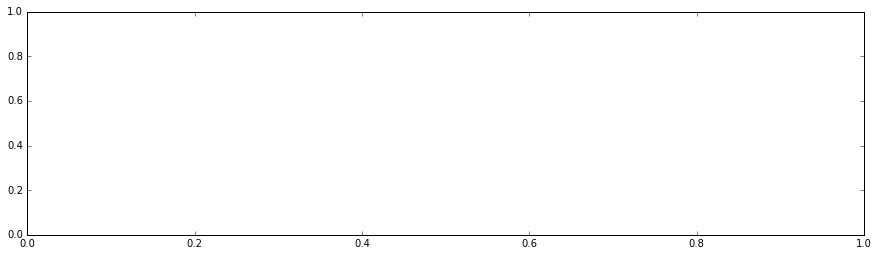

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf.boxplot(ax=ax)
plt.show()

### [Mission 4] 4대요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기
 * area의 값의 편차가 너무 심하기 때문에 그러한 편차를 줄이기 위하여 numpy.log1p (자연로그) 사용
   * Calculates log(1 + x)
   * http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
 * 두 가지 부류로 나누는 기준은 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
   * 각각을 sdf_1과 sdf_2라고 명명
 * sdf_1 및 sdf_2에 대하여 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
   * describe()가 제공하는 통계치 및 boxplot을 보면서 나름대로의 해석을 반드시 3가지이상 제시하시오.

In [20]:
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
sdf

,temp,RH,wind,rain,area
0,temp,RH,wind,rain,area
1,8.2,51,6.7,0,0
2,18,33,0.9,0,0
3,14.6,33,1.3,0,0
4,8.3,97,4,0.2,0
5,11.4,99,1.8,0,0
6,22.2,29,5.4,0,0
7,24.1,27,3.1,0,0
8,8,86,2.2,0,0
9,13.1,63,5.4,0,0


In [21]:
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
sdf

AttributeError: 'str' object has no attribute 'log1p'

In [22]:
sdf.describe()

,temp,RH,wind,rain,area
count,518,518,518,518,518
unique,193,76,22,8,252
top,17.4,27,2.2,0,0
freq,8,33,53,509,247


In [23]:
sdf_1 = sdf[sdf['area'] >= 0.41871]
sdf_2 = sdf[sdf['area'] < 0.41871]

In [24]:
sdf_1.describe()

,temp,RH,wind,rain,area
count,518,518,518,518,518
unique,193,76,22,8,252
top,17.4,27,2.2,0,0
freq,8,33,53,509,247


In [25]:
sdf_2.describe()

,temp,RH,wind,rain,area
count,0,0,0,0,0
unique,0,0,0,0,0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


IndexError: list index out of range

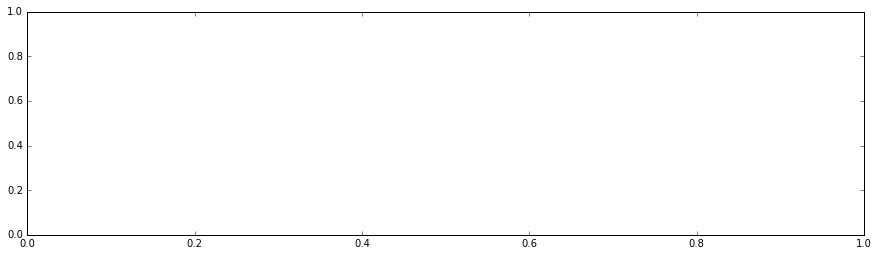

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf_1.boxplot(ax=ax)
plt.show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


IndexError: list index out of range

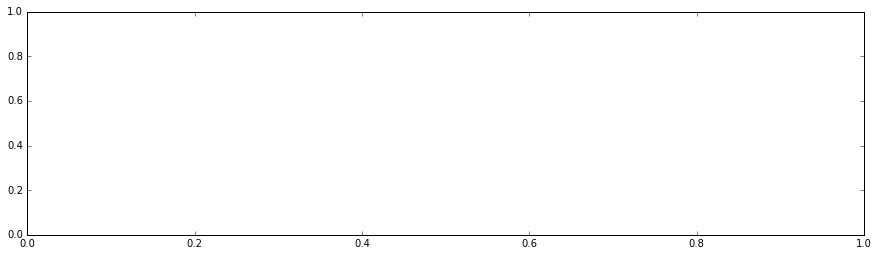

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf_2.boxplot(ax=ax)
plt.show()

### [Mission 5] 단일변수 선형 회귀분석을 통하여 가장 영향이 높은 속성 선발
 * 다음 요인들 중 area와 가장 연관성이 높은 주요 요인을 선정
   * FFMC
   * DMC
   * DC
   * ISI
   * temp
   * RH
   * wind
   * rain
 * 가장 높은 상관관계를 지닌 속성 하나를 선정하여 선형 회귀식을 제시하시오.

In [28]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
sdf.head()

AttributeError: 'str' object has no attribute 'log1p'

In [29]:
predicator_names = ('FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
predicator_analysis = {}
for i in range(0, 7):
    predicator_analysis[predicator_names[i]] = np.corrcoef(sdf[predicator_names[i]], sdf['area'])[0][1]
print predicator_analysis    

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### [Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행
 * 선형 회귀분석 성능이 좋은지 자신의 의견을 제시하시오.

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = zip(sdf['temp'], sdf['RH'])
Y = sdf['area'].values
regr = regr.fit(X, Y)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

ValueError: could not convert string to float: area

 * 선형 회귀식
   * $y = 1.928 + 0.881 * temp - 0.129 * RH$

In [32]:
predicted_area = []
for i in range(0, len(sdf)):
    predicted_area.append(regr.predict(X[i]))

sdf.loc[:, 'predicted_area'] = predicted_area
sdf

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### [Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행
 * area의 값의 편차가 너무 심하기 때문에 그러한 편차를 줄이기 위하여 numpy.log1p (자연로그) 사용
   * Calculates log(1 + x)
   * http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
 * 새로운 Categorical Variable로서 0 및 1을 지니는 'fire' 컬럼 생성
 * 두 가지 부류로 나누는 기준은 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
   * log(1 + area) 값이 50% percentile 이상이면 'fire' 컬럼 값이 1
   * log(1 + area) 값이 50% percentile 이하이면 'fire' 컬럼 값이 0
 * 로지스틱 회귀분석에 의한 분류의 정확도를 최종적으로 출력하시오.

In [33]:
sdf = df[['temp', 'RH', 'area']]
sdf.loc[:, 'area'] = np.log1p(sdf['area'])
fire = []
for i in range(0, len(sdf)):
    if sdf.iloc[i]['area'] >= 0.41871:
        fire.append(1)
    else:
        fire.append(0)

sdf.loc[:, 'fire'] = fire
sdf

AttributeError: 'str' object has no attribute 'log1p'

In [34]:
X = zip(sdf['temp'], sdf['RH'])
Y = sdf['fire'].values
regr2 = linear_model.LogisticRegression()
regr2.fit(X, Y)

KeyError: 'fire'

In [35]:
print 'Coefficients:', regr2.coef_
print 'Intercept:', regr2.intercept_

Coefficients:

NameError: name 'regr2' is not defined

In [36]:
predicted_fire = []
for i in range(0, len(sdf)):
    predicted_fire.append(regr2.predict(X[i]))

sdf.loc[:, 'predicted_fire'] = predicted_fire
sdf

NameError: name 'regr2' is not defined

In [37]:

correctly_predicted = 0
for i in range(0, len(sdf)):
    if predicted_fire[i] == Y[i]:
        correctly_predicted += 1
        
print float(correctly_predicted) / len(sdf)

IndexError: list index out of range